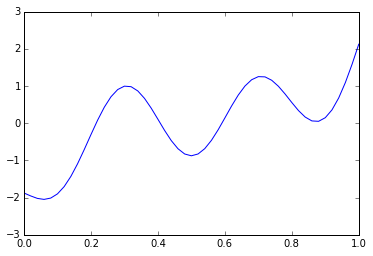

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline

def outfct(x,epsilon):
    y = -1.0*np.sin(5.0*math.pi*x)+2.0*np.power((2.0*x-1),3)+epsilon
    y = y-np.mean(y)
    return y

x = np.matrix(np.linspace(0.0,1.0,51)).T
epsilon = rd.random()
y = outfct(x,epsilon)

plt.plot(x,y)
plt.show()


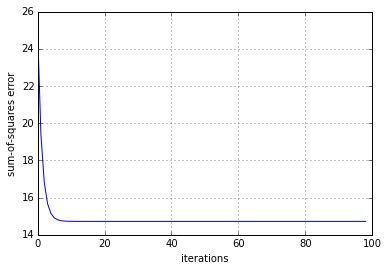

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


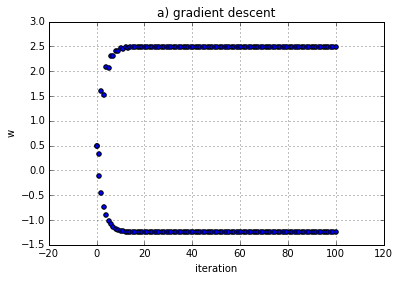

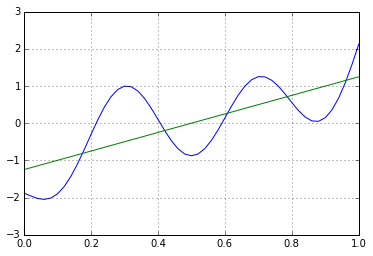

In [18]:

def output(w,xa):
    if len(w) == 2:
        X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    elif len(w) == 6:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5)),axis=0)
    elif len(w) == 10:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9)),axis=0)
    elif len(w) == 15:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9),np.power(xa.T,10),np.power(xa.T,11),np.power(xa.T,12),np.power(xa.T,13),np.power(xa.T,14)),axis=0)
    y = np.dot(w.T,X)
    return y

def sumsquerror(w,xa,ta):
    arg = output(w,xa)-ta.T
    err = 0.5*np.dot(arg,arg.T)
    return err[0]

def gradient(w,xa,ta):
    if len(w) == 2:
        X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    elif len(w) == 6:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5)),axis=0)
    elif len(w) == 10:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9)),axis=0)
    elif len(w) == 15:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9),np.power(xa.T,10),np.power(xa.T,11),np.power(xa.T,12),np.power(xa.T,13),np.power(xa.T,14)),axis=0)
    H = np.dot(X,np.transpose(X))
    b = -1.0*np.dot(X,ta)
    g = np.dot(H,w)+b
    return g

def alpha_line_search(grad,xa):
    if len(grad) == 2:
        X = np.concatenate((np.matrix(np.ones(len(xa))*1.0),xa.T),axis=0)
    elif len(grad) == 6:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5)),axis=0)
    elif len(grad) == 10:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9)),axis=0)
    elif len(grad) == 15:
        X = np.concatenate((np.matrix(np.power(xa.T,0)),xa.T,np.square(xa.T),np.power(xa.T,3),np.power(xa.T,4),np.power(xa.T,5),np.power(xa.T,6),np.power(xa.T,7),np.power(xa.T,8),np.power(xa.T,9),np.power(xa.T,10),np.power(xa.T,11),np.power(xa.T,12),np.power(xa.T,13),np.power(xa.T,14)),axis=0)
    H = np.dot(X,np.transpose(X))
    anum = np.dot(np.transpose(grad),grad)
    Hgrad = np.dot(H,grad)
    aden = np.dot(np.transpose(grad),Hgrad)
    alpha = -1.0 * np.divide( anum , aden )
    return alpha

w1 = np.ones((2,1))-0.5

# regression 1st order
n_iter = 0
iter_max = 100
Error1 = np.array(np.zeros(iter_max))
y1 = np.array(np.zeros((iter_max,len(y))))
w_tr1 = np.zeros((iter_max,2))
eta = 0.01

while n_iter < iter_max:
    w_tr1[n_iter][:] = w1.T
    y1[n_iter] = output(w1,x)
    Error1[n_iter] = sumsquerror(w1,x,y)
    grad = gradient(w1,x,y)
    alpha = alpha_line_search(grad,x)
    w1 = w1 + np.multiply(alpha,grad)
    n_iter = n_iter+1


Error1 = np.delete(Error1,0)
y1 = np.delete(y1,0)

plt.plot(Error1)
plt.xlabel('iterations')
plt.ylabel('sum-of-squares error')
plt.grid()
plt.show()

plt.scatter(np.linspace(0,iter_max,len(w_tr1[:,0])).T,w_tr1[:,0])
plt.scatter(np.linspace(0,iter_max,len(w_tr1[:,0])).T,w_tr1[:,1])
plt.xlabel('iteration')
plt.ylabel('w')
plt.title('a) gradient descent')
plt.grid()
plt.show()

final1 = np.squeeze(output(w1,x))
plt.plot(x,y)
plt.plot(x,final1.T)
plt.grid()
plt.show()


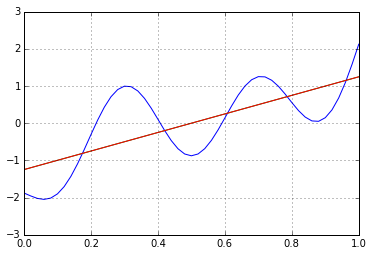

In [19]:
# comparison with analytical regression
xreg = x.A.squeeze()
yreg = y.A.squeeze()

coeff1 = np.polyfit(xreg,yreg,1)
yreg1 = np.polyval(coeff1,x)
final1 = np.squeeze(output(w1,x))
plt.plot(x,y)
plt.plot(x,final1.T)
plt.plot(x,yreg1)
plt.grid()
plt.show()

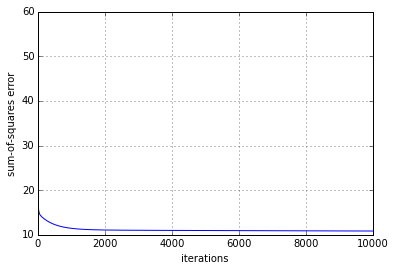

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


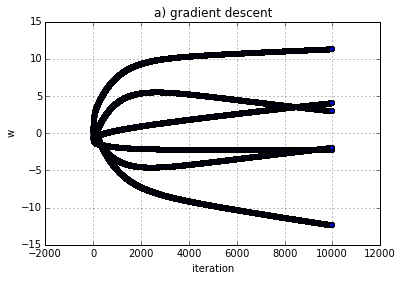

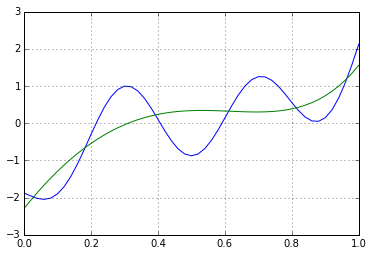

In [20]:
# regression 5th order
w5 = np.ones((6,1))-0.5
n_iter = 0
iter_max = 10000
Error5 = np.array(np.zeros(iter_max))
y5 = np.array(np.zeros((iter_max,len(y))))
w_tr5 = np.zeros((iter_max,6))
eta = 0.01

while n_iter < iter_max:
    w_tr5[n_iter,:] = w5.T
    y5[n_iter] = output(w5,x)
    Error5[n_iter] = sumsquerror(w5,x,y)
    grad = gradient(w5,x,y)
    alpha = alpha_line_search(grad,x)
    w5 = w5 + np.multiply(alpha,grad)
    n_iter = n_iter+1


y5 = np.delete(y5,0)
plt.plot(Error5)
plt.xlabel('iterations')
plt.ylabel('sum-of-squares error')
plt.grid()
plt.show()

plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,0])
plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,1])
plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,2])
plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,3])
plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,4])
plt.scatter(np.linspace(0,iter_max,len(w_tr5[:,0])).T,w_tr5[:,5])
plt.xlabel('iteration')
plt.ylabel('w')
plt.title('a) gradient descent')
plt.grid()
plt.show()

final5 = np.squeeze(output(w5,x))
plt.plot(x,y)
plt.plot(x,final5.T)
plt.grid()
plt.show()

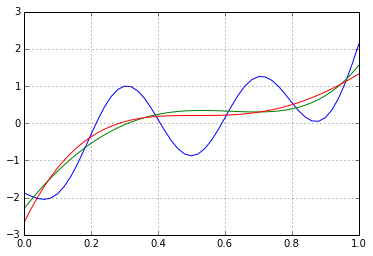

In [12]:
# comparison with analytical regression
xreg = x.A.squeeze()
yreg = y.A.squeeze()

coeff5 = np.polyfit(xreg,yreg,5)
yreg5 = np.polyval(coeff5,x)
final5 = np.squeeze(output(w5,x))
plt.plot(x,y)
plt.plot(x,final5.T)
plt.plot(x,yreg5)
plt.grid()
plt.show()

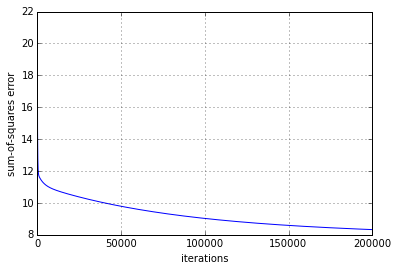

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


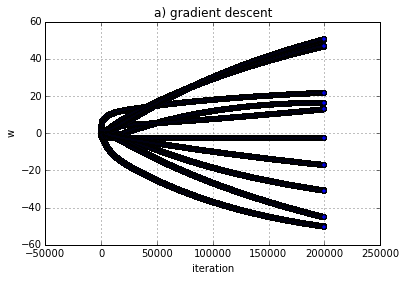

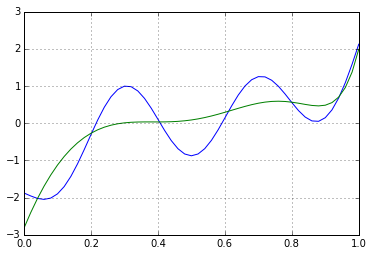

In [13]:
# regression 9th order
w9 = np.ones((10,1))-0.5
n_iter = 0
iter_max = 200000
Error9 = np.array(np.zeros(iter_max))
y9 = np.array(np.zeros((iter_max,len(y))))
w_tr9 = np.zeros((iter_max,10))

while n_iter < iter_max:
    w_tr9[n_iter,:] = w9.T
    y9[n_iter] = output(w9,x)
    Error9[n_iter] = sumsquerror(w9,x,y)
    grad = gradient(w9,x,y)
    alpha = alpha_line_search(grad,x)
    w9 = w9 + np.multiply(alpha,grad)
    n_iter = n_iter+1


Error9 = np.delete(Error9,0)
y9 = np.delete(y9,0)
plt.plot(Error9)
plt.xlabel('iterations')
plt.ylabel('sum-of-squares error')
plt.grid()
plt.show()

plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,0])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,1])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,2])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,3])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,4])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,5])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,6])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,7])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,8])
plt.scatter(np.linspace(0,iter_max,len(w_tr9[:,0])).T,w_tr9[:,9])
plt.xlabel('iteration')
plt.ylabel('w')
plt.title('a) gradient descent')
plt.grid()
plt.show()

final9 = np.squeeze(output(w9,x))
plt.plot(x,y)
plt.plot(x,final9.T)
plt.grid()
plt.show()

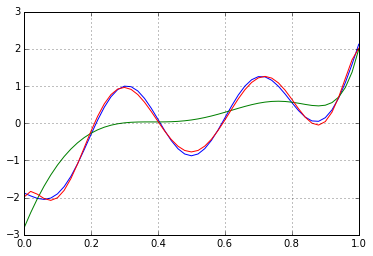

In [14]:
# comparison with analytical regression
xreg = x.A.squeeze()
yreg = y.A.squeeze()

coeff9 = np.polyfit(xreg,yreg,9)
yreg9 = np.polyval(coeff9,x)
final9 = np.squeeze(output(w9,x))
plt.plot(x,y)
plt.plot(x,final9.T)
plt.plot(x,yreg9)
plt.grid()
plt.show()

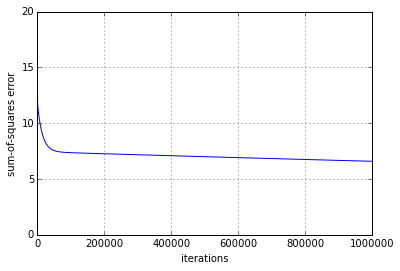

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


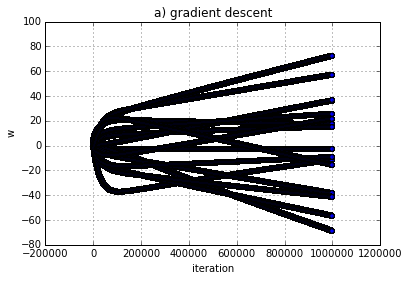

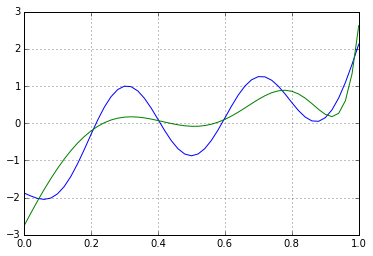

In [15]:
# regression 14th order
w14 = np.zeros((15,1))
n_iter = 0
iter_max = 1000000
Error14 = np.array(np.zeros(iter_max))
y14 = np.array(np.zeros((iter_max,len(y))))
w_tr14 = np.zeros((iter_max,15))
eta = 0.5

while n_iter < iter_max:
    w_tr14[n_iter,:] = w14.T
    y14[n_iter] = output(w14,x)
    Error14[n_iter] = sumsquerror(w14,x,y)
    grad = gradient(w14,x,y)
    alpha = alpha_line_search(grad,x)
    w14 = w14 + np.multiply(alpha,grad)
    n_iter = n_iter+1

Error14 = np.delete(Error14,0)
y14 = np.delete(y14,0)
plt.plot(Error14)
plt.xlabel('iterations')
plt.ylabel('sum-of-squares error')
plt.ylim(0,20)
plt.grid()
plt.show()

plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,0])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,1])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,2])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,3])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,4])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,5])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,6])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,7])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,8])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,9])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,10])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,11])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,12])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,13])
plt.scatter(np.linspace(0,iter_max,len(w_tr14[:,0])).T,w_tr14[:,14])
plt.xlabel('iteration')
plt.ylabel('w')
plt.title('a) gradient descent')
plt.grid()
plt.show()

final14 = np.squeeze(output(w14,x))
plt.plot(x,y)
plt.plot(x,final14.T)
plt.grid()
plt.show()


2


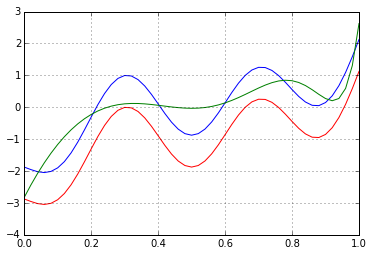

In [201]:
xreg = x.A.squeeze()
yreg = y.A.squeeze()
print (x.ndim)
coeff14 = np.polyfit(xreg,yreg,14)
yreg14 = np.polyval(coeff14,x)
final14 = np.squeeze(output(w14,x))
plt.plot(x,y)
plt.plot(x,final14.T)
plt.plot(x,yreg14)
plt.grid()
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in true_divide


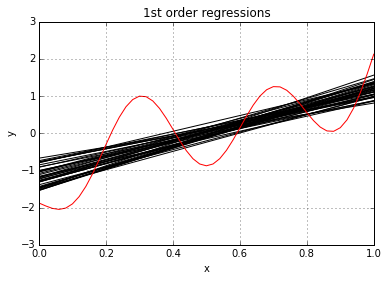

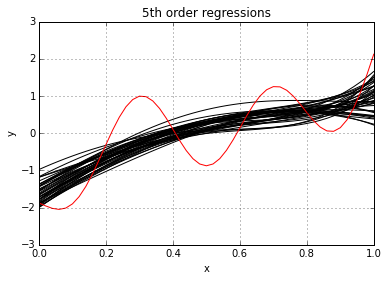

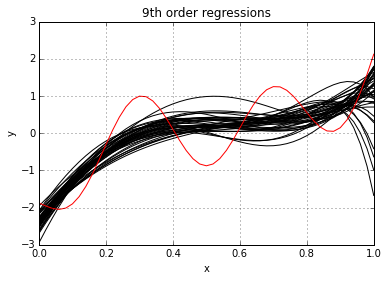

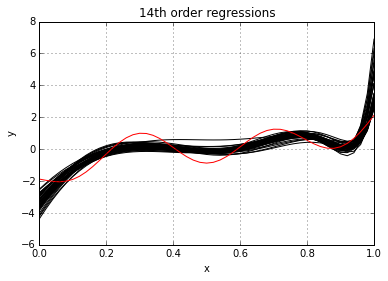

In [54]:
# generate 40 different random samples
x_rd = np.random.rand(51,40)
i = 0
while i<40:
    x_rd[:,i] = np.sort(x_rd[:,i])
    i = i+1
y_rd = outfct(x_rd,epsilon)

w1_final = np.zeros((2,40))
w5_final = np.zeros((6,40))
w9_final = np.zeros((10,40))
w14_final = np.zeros((15,40))

# simulation 1st order
i=0
while i<40:
    xi = np.matrix(x_rd[:,i]).T
    yi = np.matrix(y_rd[:,i]).T
    
    # regression 1st order
    w1 = np.ones((2,1))-0.5
    n_iter = 0
    iter_max = 100 ###
    while n_iter < iter_max:
        grad = gradient(w1,xi,yi)
        alpha = alpha_line_search(grad,xi)
        w1 = w1 + np.multiply(alpha,grad)
        n_iter = n_iter+1
    w1_final[:,i] = np.squeeze(w1)
    
    
    # regression 5th order
    w5 = np.ones((6,1))-0.5
    n_iter = 0
    iter_max = 500 ###
    while n_iter < iter_max:
        grad = gradient(w5,xi,yi)
        alpha = alpha_line_search(grad,xi)
        w5 = w5 + np.multiply(alpha,grad)
        n_iter = n_iter+1
    w5_final[:,i] = np.squeeze(w5)
    
    
    # regression 9th order
    w9 = np.ones((10,1))-0.5
    n_iter = 0
    iter_max = 10000 ###
    while n_iter < iter_max:
        grad = gradient(w9,xi,yi)
        alpha = alpha_line_search(grad,xi)
        w9 = w9 + np.multiply(alpha,grad)
        n_iter = n_iter+1
    w9_final[:,i] = np.squeeze(w9)
    
    
    # regression 14th order
    w14 = np.ones((15,1))-0.5
    n_iter = 0
    iter_max = 100000 ###
    while n_iter < iter_max:
        grad = gradient(w14,xi,yi)
        alpha = alpha_line_search(grad,xi)
        w14 = w14 + np.multiply(alpha,grad)
        n_iter = n_iter+1
    w14_final[:,i] = np.squeeze(w14) 
    
    i = i+1
    
    
# calculate 4x40 final polynomials
Errors1 = np.zeros((40,1))
Errors5 = np.zeros((40,1))
Errors9 = np.zeros((40,1))
Errors14 = np.zeros((40,1))

Output1 = np.zeros((51,40))
Output5 = np.zeros((51,40))
Output9 = np.zeros((51,40))
Output14 = np.zeros((51,40))

i=0
while i<40:
    xi = np.matrix(x_rd[:,i]).T
    yi = np.matrix(y_rd[:,i]).T
    Output1[:,i] = output(w1_final[:,i],x)
    Errors1[i] = sumsquerror(w1_final[:,i],xi,yi)
    plt.plot(x,Output1[:,i],color='k')
    i = i+1
Out1avg = np.nanmean(Output1,axis=1)
plt.plot(x,Out1avg,color = 'b')
plt.plot(x,y,color='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('1st order regressions')
plt.show()
    
i=0
while i<40:
    xi = np.matrix(x_rd[:,i]).T
    yi = np.matrix(y_rd[:,i]).T
    Output5[:,i] = output(w5_final[:,i],x)
    Errors5[i] = sumsquerror(w5_final[:,i],xi,yi)
    plt.plot(x,Output5[:,i],color='k')
    i = i+1
Out5avg = np.nanmean(Output5,axis=1)
plt.plot(x,Out5avg,color = 'b')
plt.plot(x,y,color='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('5th order regressions')
plt.show()
    
i=0
while i<40:
    xi = np.matrix(x_rd[:,i]).T
    yi = np.matrix(y_rd[:,i]).T
    Output9[:,i] = output(w9_final[:,i],x)
    Errors9[i] = sumsquerror(w9_final[:,i],xi,yi)
    plt.plot(x,Output9[:,i],color='k')
    i = i+1
Out9avg = np.nanmean(Output9,axis=1)
plt.plot(x,Out9avg,color = 'b')
plt.plot(x,y,color='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('9th order regressions')
plt.show()
    
i=0
while i<40:
    xi = np.matrix(x_rd[:,i]).T
    yi = np.matrix(y_rd[:,i]).T
    Output14[:,i] = output(w14_final[:,i],x)
    Errors14[i] = sumsquerror(w14_final[:,i],xi,yi)
    plt.plot(x,Output14[:,i],color='k')
    i = i+1
Out14avg = np.nanmean(Output14,axis=1)
plt.plot(x,Out14avg,color = 'b')
plt.plot(x,y,color='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('14th order regressions')
plt.show()

    
E1 = np.mean(Errors1)
E5 = np.mean(Errors5)
E9 = np.mean(Errors9)
E14 = np.mean(Errors14)

var1 = np.var(Errors1)
var5 = np.var(Errors5)
var9 = np.var(Errors9)
var14 = np.var(Errors14)

Populating the interactive namespace from numpy and matplotlib


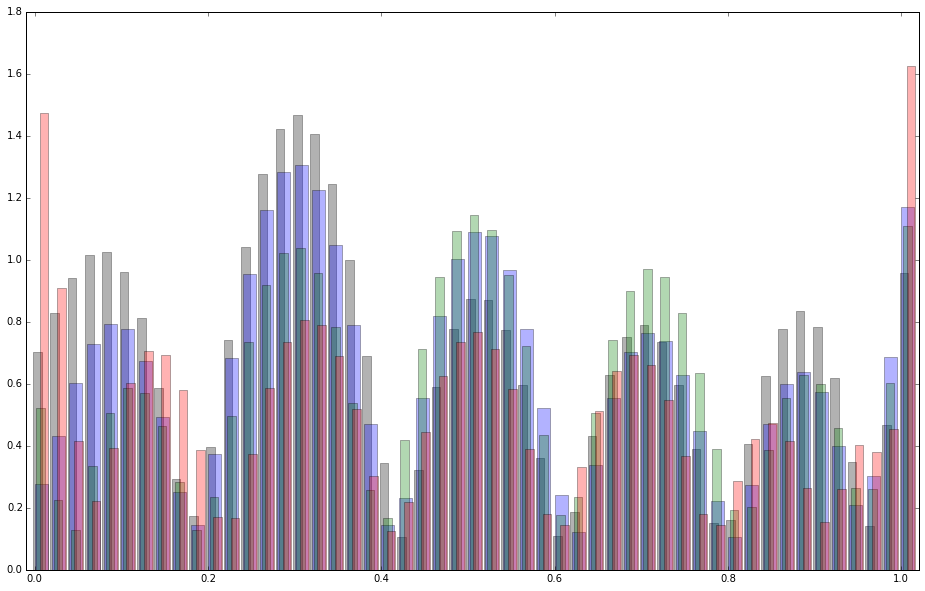

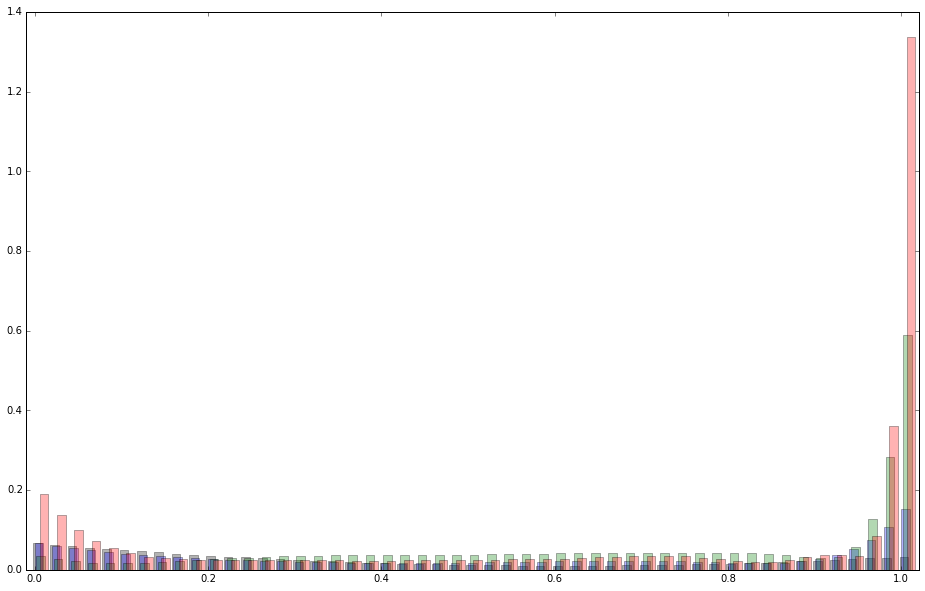

ValueError: x and y can be no greater than 2-D

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


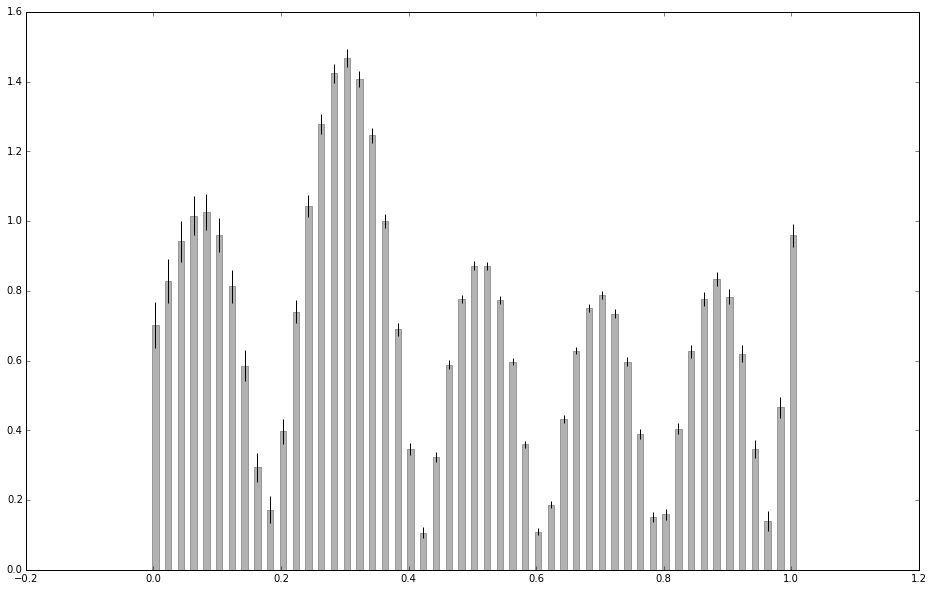

In [118]:
# compute average predictions, variance and bias for each point x_i

Var1 = np.array(np.nanvar(Output1,1))
Var5 = np.nanvar(Output5,1)
Var9 = np.nanvar(Output9,1)
Var14 = np.nanvar(Output14,1)

Bias1 = np.absolute(np.subtract(Output1,y))
Bias5 = np.absolute(np.subtract(Output5,y))
Bias9 = np.absolute(np.subtract(Output9,y))
Bias14 = np.absolute(np.subtract(Output14,y))

Bias1avg = np.nanmean(Bias1,axis=1)
Bias5avg = np.nanmean(Bias5,axis=1)
Bias9avg = np.nanmean(Bias9,axis=1)
Bias14avg = np.nanmean(Bias14,axis=1)

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

plt.bar(x-0.002,Bias1avg,0.01,alpha=0.3,color='k')
plt.bar(x,Bias5avg,0.015,alpha=0.3,color='b')
plt.bar(x+0.002,Bias9avg,0.01,alpha=0.3,color='g')
plt.bar(x+0.006,Bias14avg,0.01,alpha=0.3,color='r')
plt.xlim(-0.01,1.02)
plt.show()

plt.bar(x-0.002,Var1,0.01,alpha=0.3,color='k')
plt.bar(x,Var5,0.01,alpha=0.3,color='b')
plt.bar(x+0.002,Var9,0.01,alpha=0.3,color='g')
plt.bar(x+0.006,Var14,0.01,alpha=0.3,color='r')
plt.xlim(-0.01,1.02)
plt.show()

plt.bar(x-0.002,Bias1avg,0.01,alpha=0.3,color='k',yerr = Var1)
plt.bar(x,Bias5avg,0.01,alpha=0.3,color='b',yerr = Var5)
plt.bar(x+0.002,Bias9avg,0.01,alpha=0.3,color='g',yerr = Var9)
plt.bar(x+0.006,Bias14avg,0.01,alpha=0.3,color='r',yerr = Var14)
plt.xlim(-0.01,1.02)
plt.show()



In [122]:
print(np.array(Var5).shape)
print(np.array([0,1,2,3]).shape)

(51,)
(4,)


In [ ]:
# regression 14th order with penalty term
w14 = np.zeros((15,1))
n_iter = 0
iter_max = 1000000
Error14 = np.array(np.zeros(iter_max))
y14 = np.array(np.zeros((iter_max,len(y))))
w_tr14 = np.zeros((iter_max,15))
eta = 0.5

while n_iter < iter_max:
    w_tr14[n_iter,:] = w14.T
    y14[n_iter] = output(w14,x)
    Error14[n_iter] = sumsquerror(w14,x,y)
    grad = gradient(w14,x,y)
    alpha = alpha_line_search(grad,x)
    w14 = w14 + np.multiply(alpha,grad)
    n_iter = n_iter+1

Error14 = np.delete(Error14,0)
y14 = np.delete(y14,0)
plt.plot(Error14)
plt.xlabel('iterations')
plt.ylabel('sum-of-squares error')
plt.ylim(0,20)
plt.grid()
plt.show()

final14 = np.squeeze(output(w14,x))
plt.plot(x,y)
plt.plot(x,final14.T)
plt.grid()
plt.show()
